In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm
import seaborn as sns


In [ ]:
# อ่านข้อมูล
df = pd.read_excel("/content/Data_CollectStatOTADE282.xlsx")

<Axes: xlabel='Agoda Price', ylabel='Count'>

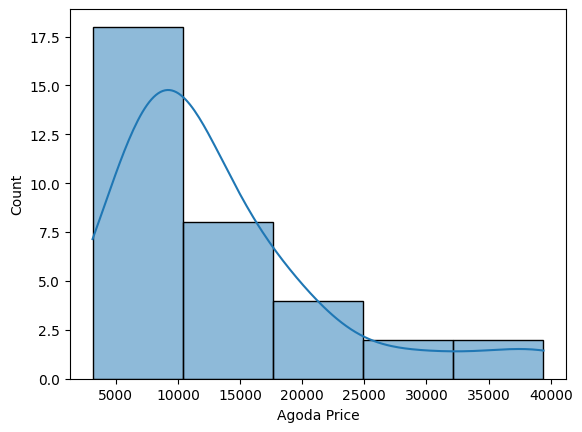

In [ ]:
sns.histplot(df["Agoda Price"],bins=5,kde=True)


<Axes: xlabel='Traveloka Price', ylabel='Count'>

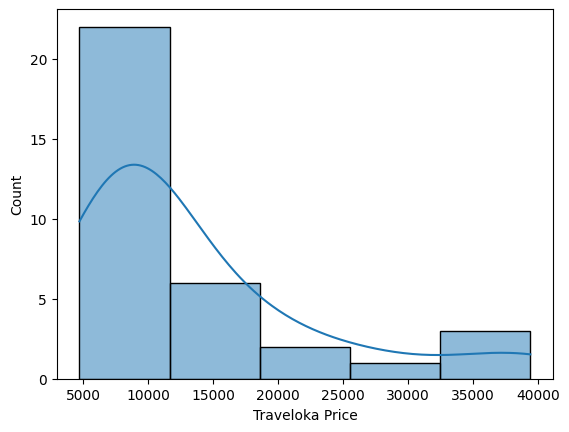

In [ ]:
sns.histplot(df["Traveloka Price"],bins=5,kde=True)

<Axes: xlabel='Trip.com Price', ylabel='Count'>

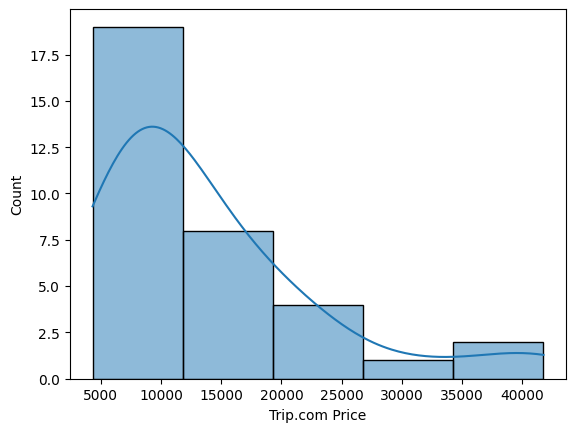

In [ ]:
sns.histplot(df["Trip.com Price"],bins=5,kde=True)



In [ ]:
mean_agoda_price = df["Agoda Price"].mean()
std_agoda = df["Agoda Price"].std()

mean_travel_price = df["Traveloka Price"].mean()
std_travel = df["Traveloka Price"].std()

mean_trip_price = df["Trip.com Price"].mean()
std_trip = df["Trip.com Price"].std()

print(f"The mean for Agoda Price is {mean_agoda_price} and the standard deviation for Agoda Price is {std_agoda}")

print(f"The mean for Traveloka Price is {mean_travel_price} and the standard deviation for Traveloka Price is {std_travel}")

print(f"The mean for Trip.com Price is {mean_trip_price} and the standard deviation for Trip.com Price is {std_trip}")


The mean for Agoda Price is 13465.01882352941 and the standard deviation for Agoda Price is 8818.396653324355
The mean for Traveloka Price is 13641.450882352941 and the standard deviation for Traveloka Price is 9348.462284395864
The mean for Trip.com Price is 13871.923529411766 and the standard deviation for Trip.com Price is 9230.792564776471


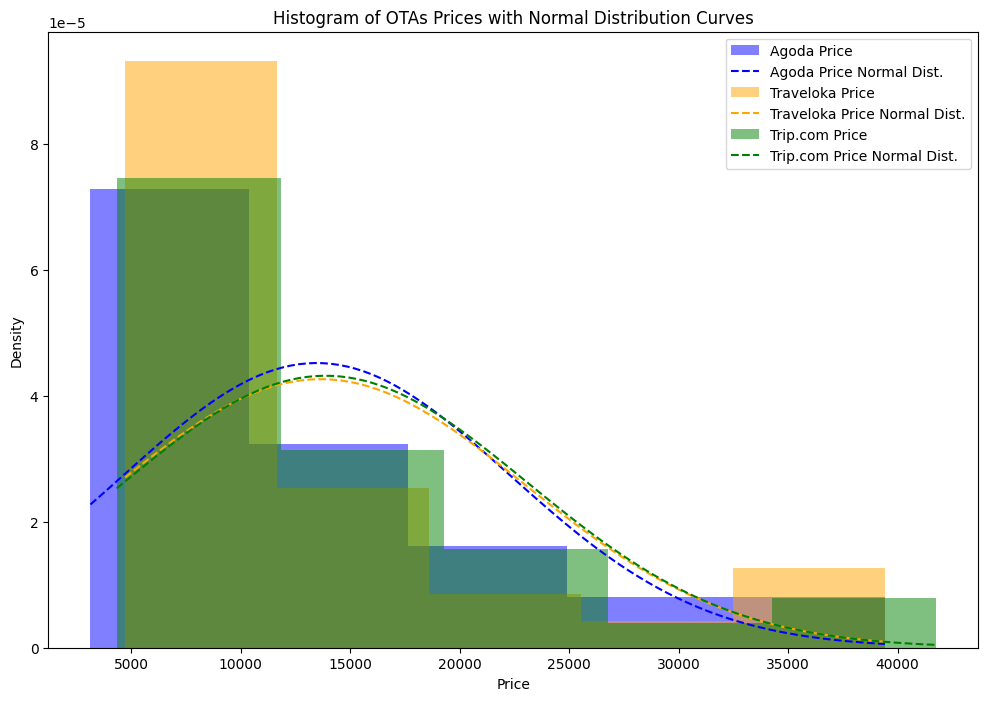

In [ ]:
# Plot histogram พร้อมเส้นโค้ง normal distribution สำหรับแต่ละ OTA
plt.figure(figsize=(12, 8))

for ota, color in zip(['Agoda Price', 'Traveloka Price', 'Trip.com Price'], ['blue', 'orange', 'green']):

    # Plot histogram
    plt.hist(df[ota], bins=5, alpha=0.5, label=ota, color=color, density=True)

    # สร้างช่วงข้อมูลสำหรับเส้นโค้ง normal distribution
    mean_price = df[ota].mean()
    min_price = df[ota].min()
    max_price = df[ota].max()
    x = np.linspace(min_price, max_price, 100)
    std_dev = df[ota].std()

    # คำนวณค่าความหนาแน่นตามการกระจายปกติ
    y = norm.pdf(x, mean_price, std_dev)

    # Plot เส้นโค้ง normal distribution
    plt.plot(x, y, color=color, linestyle='--', label=f'{ota} Normal Dist.')

# เพิ่มคำอธิบาย
plt.xlabel('Price')
plt.ylabel('Density')
plt.legend()
plt.title('Histogram of OTAs Prices with Normal Distribution Curves')
plt.show()

In [ ]:
# Standardize (Z-score Normalization) สำหรับแต่ละคอลัมน์
df['Agoda Price Standardized'] = (df['Agoda Price'] - mean_agoda_price) / std_agoda
df['Traveloka Price Standardized'] = (df['Traveloka Price'] - mean_travel_price) / std_travel
df['Trip.com Price Standardized'] = (df['Trip.com Price'] - mean_trip_price) / std_trip

mean_z_score_agoda = df['Agoda Price Standardized'].mean()
std_z_score_agoda = df['Agoda Price Standardized'].std()

mean_z_score_trav = df['Traveloka Price Standardized'].mean()
std_z_score_trav = df['Traveloka Price Standardized'].std()

mean_z_score_trip = df['Trip.com Price Standardized'].mean()
std_z_score_trip = df['Trip.com Price Standardized'].std()

print(f"z-score Agoda: mean= {round(mean_z_score_agoda,2)} and SD= {round(std_z_score_agoda,2)}")
print(f"z-score Traveloka: mean= {round(mean_z_score_trav, 2)} and SD= {round(std_z_score_trav, 2)}")
print(f"z-score Trip.com: mean= {round(mean_z_score_trip, 2)} and SD= {round(std_z_score_trip, 2)}")

z-score Agoda: mean= 0.0 and SD= 1.0
z-score Traveloka: mean= -0.0 and SD= 1.0
z-score Trip.com: mean= -0.0 and SD= 1.0


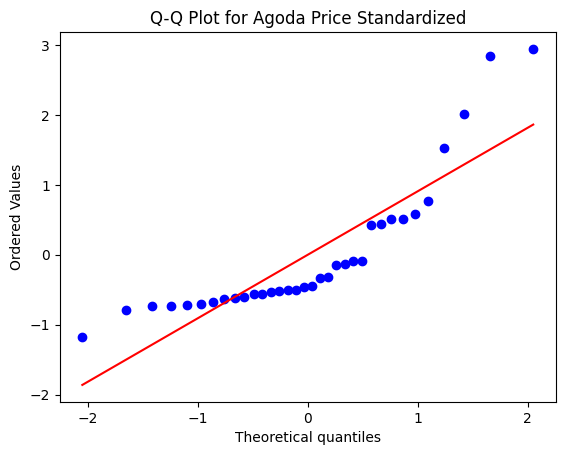

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# สร้าง Q-Q plot สำหรับข้อมูลที่ผ่านการ standardize
stats.probplot(df['Agoda Price Standardized'], dist="norm", plot=plt)
plt.title('Q-Q Plot for Agoda Price Standardized')
plt.show()


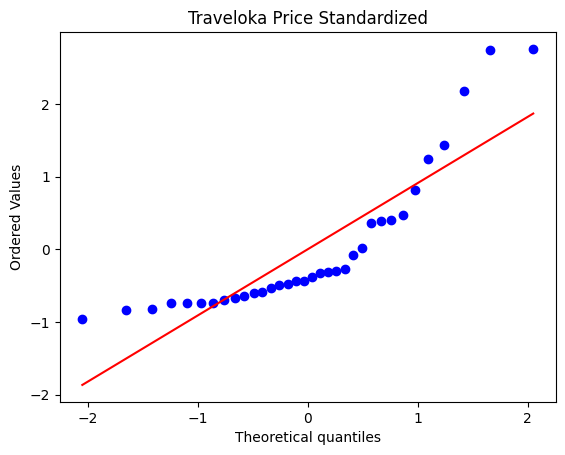

In [ ]:
stats.probplot(df['Traveloka Price Standardized'], dist="norm", plot=plt)
plt.title('Traveloka Price Standardized')
plt.show()

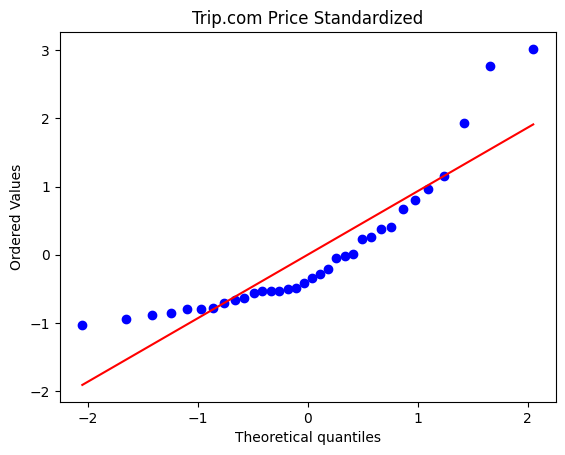

In [ ]:
stats.probplot(df['Trip.com Price Standardized'], dist="norm", plot=plt)
plt.title('Trip.com Price Standardized')
plt.show()

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(df['Agoda Price'])

print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("The data of Agoda Price might come from a normal distribution")
else:
    print("The data of Agoda Price does not come from a normal distribution")

Shapiro-Wilk Test Statistic: 0.772944791556251, p-value: 8.008742585712925e-06
The data of Agoda Price does not come from a normal distribution


In [ ]:

stat, p_value = shapiro(df['Traveloka Price'])

print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("The data of Traveloka Price might come from a normal distribution")
else:
    print("The data of Traveloka Price does not come from a normal distribution")

Shapiro-Wilk Test Statistic: 0.7726968656056811, p-value: 7.926717711257164e-06
The data of Traveloka Price does not come from a normal distribution


In [ ]:

stat, p_value = shapiro(df['Trip.com Price'])

print(f"Shapiro-Wilk Test Statistic: {stat}, p-value: {p_value}")

if p_value > 0.05:
    print("The data of Trip.com Price might come from a normal distribution")
else:
    print("The data of Trip.com Price does not come from a normal distribution")

Shapiro-Wilk Test Statistic: 0.8129454913245711, p-value: 4.6072603017901965e-05
The data of Trip.com Price does not come from a normal distribution
